In [1]:
# !pip install torchvision
from torchvision.transforms import functional as tvF
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch

class Data(Dataset):
    def __init__(self, image_dir):
        print("image_dir", image_dir)
        self.image_dir = image_dir
        self.fnames = [path.name for path in Path(image_dir).glob('*.png')]
        print(len(self.fnames))

    def __getitem__(self, i):
        # print('start dataset')
        fname = self.fnames[i]
        fpath = os.path.join(self.image_dir, fname)
        img = tvF.to_tensor(Image.open(fpath).convert('L'))   # Image.open(fpath)
        # print('fin dataset')
        return img.reshape(1, *img.shape), fname
    


In [2]:
img = torch.Tensor([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]])
# img = torch.Tensor([[0, 0, 0],
#                     [1, 1, 1],
#                     [0, 0, 0]])


img = F.pad(img, (1, 1, 1, 1), "constant", 0) 
img = img.reshape(1, 1, *img.shape)

kernel = torch.Tensor([[-1., 0., 1.],
                    [-2., 0., 2.],
                    [-1., 0., 1.]])
kernel = kernel.reshape(1, 1, *kernel.shape)
score_map1 = F.conv2d(img, kernel)
print(score_map1)

kernel = torch.transpose(kernel, 2, 3)
score_map2 = F.conv2d(img, kernel)
print(score_map2)

print('abs:', (score_map1 - score_map2).abs().mean())
print('sub:', (score_map1 + score_map2).mean())

tensor([[[[ 3.,  0., -3.],
          [ 4.,  0., -4.],
          [ 3.,  0., -3.]]]])
tensor([[[[ 3.,  4.,  3.],
          [ 0.,  0.,  0.],
          [-3., -4., -3.]]]])
abs: tensor(3.1111)
sub: tensor(0.)


image_dir ./afm_dataset/patch15_2
10
map_abs_max tensor(0.9843)


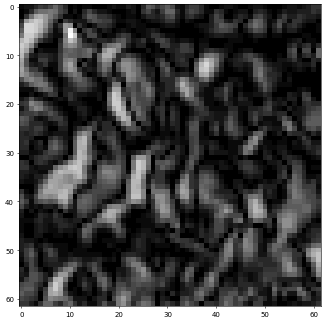

gt.png :|dx| = 0.20394398272037506
map_abs_max tensor(1.5804)


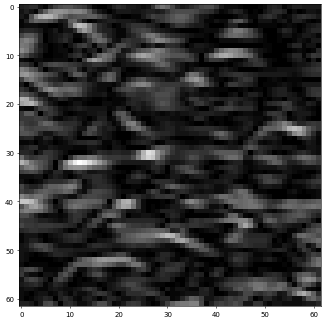

gt.png :|dy| = 0.2683356702327728
-----
map_abs_max tensor(0.9843)


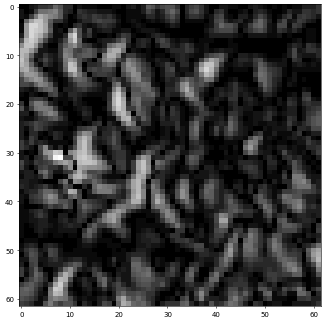

input000.png :|dx| = 0.19279853999614716
map_abs_max tensor(2.5882)


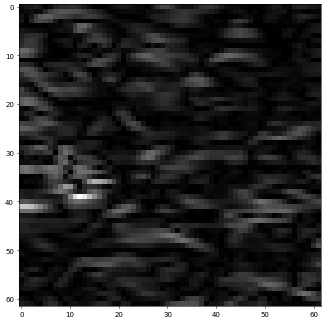

input000.png :|dy| = 0.2866509258747101
-----
map_abs_max tensor(1.1059)


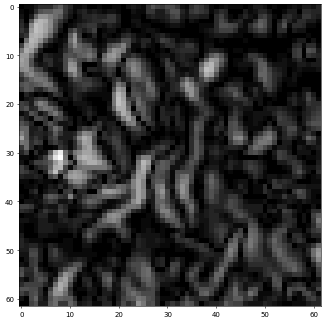

input001.png :|dx| = 0.1974189281463623
map_abs_max tensor(2.8588)


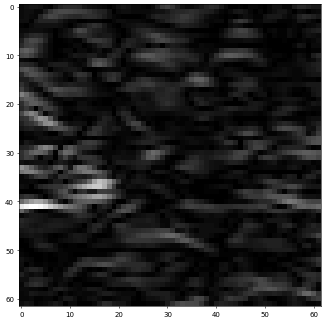

input001.png :|dy| = 0.29508474469184875
-----
map_abs_max tensor(0.8824)


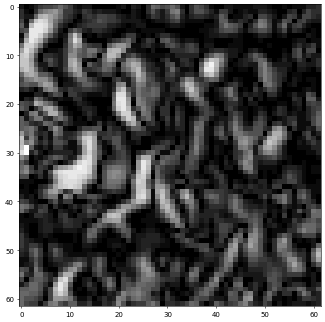

input002.png :|dx| = 0.2005498707294464
map_abs_max tensor(2.3373)


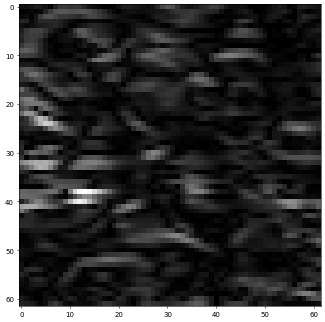

input002.png :|dy| = 0.28977063298225403
-----
map_abs_max tensor(0.8392)


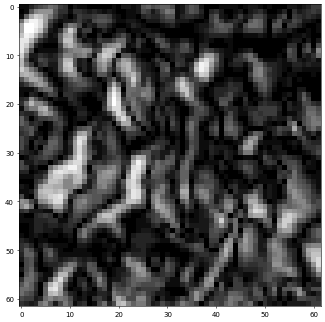

input003.png :|dx| = 0.20515085756778717
map_abs_max tensor(1.5294)


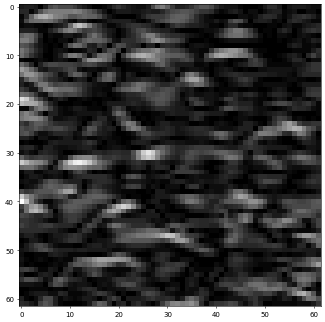

input003.png :|dy| = 0.26716142892837524
-----
map_abs_max tensor(0.9020)


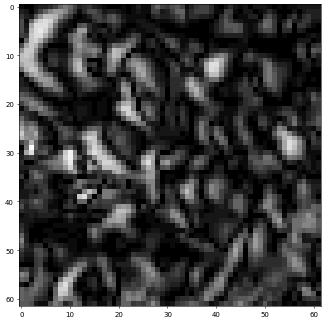

input004.png :|dx| = 0.1960284262895584
map_abs_max tensor(2.5922)


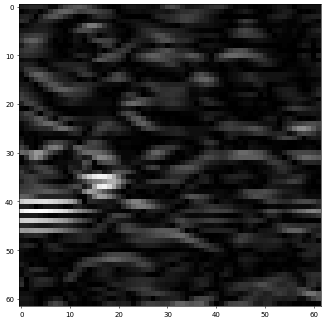

input004.png :|dy| = 0.32275909185409546
-----
map_abs_max tensor(1.1725)


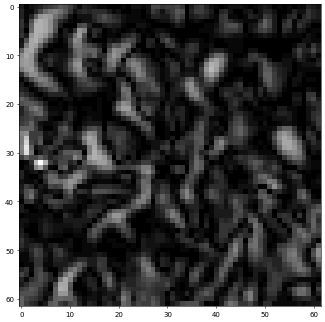

input005.png :|dx| = 0.19610393047332764
map_abs_max tensor(3.1333)


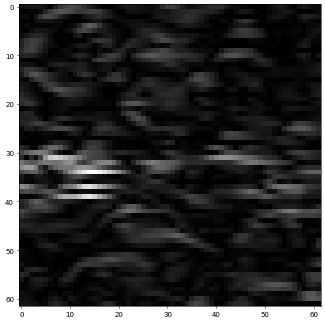

input005.png :|dy| = 0.3270031213760376
-----
map_abs_max tensor(0.8353)


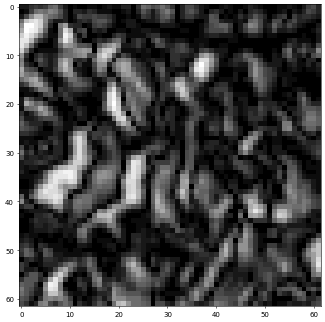

input006.png :|dx| = 0.1981065422296524
map_abs_max tensor(1.8353)


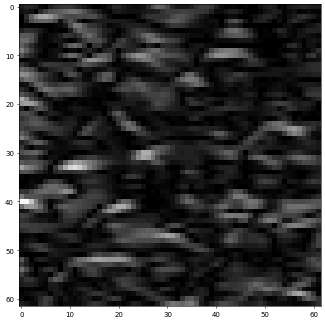

input006.png :|dy| = 0.2702312171459198
-----
map_abs_max tensor(1.3804)


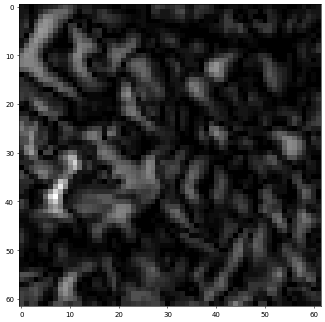

input007.png :|dx| = 0.20807981491088867
map_abs_max tensor(2.4235)


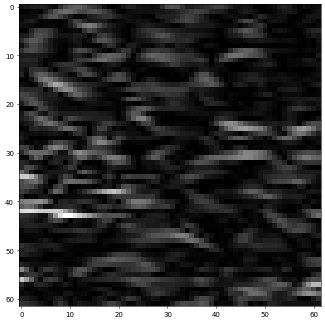

input007.png :|dy| = 0.3196690082550049
-----
map_abs_max tensor(1.0235)


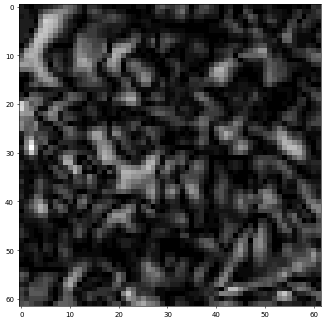

input008.png :|dx| = 0.19896148145198822
map_abs_max tensor(2.9804)


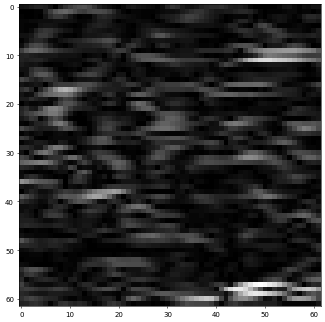

input008.png :|dy| = 0.39668434858322144
-----
{0: 0.06439167261123657, 1: 0.09385240823030472, 2: 0.09766583144664764, 3: 0.08922078460454941, 4: 0.062010571360588074, 5: 0.12673072516918182, 6: 0.13089919090270996, 7: 0.07212463021278381, 8: 0.1115892305970192, 9: 0.19772297143936157}


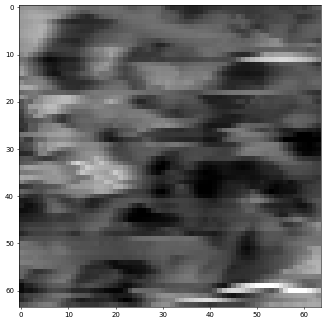

mean(|dy| - |dx|)= 0.19772297143936157
input008.png


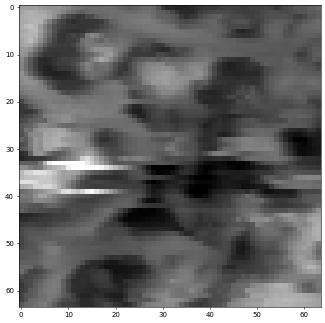

mean(|dy| - |dx|)= 0.13089919090270996
input005.png


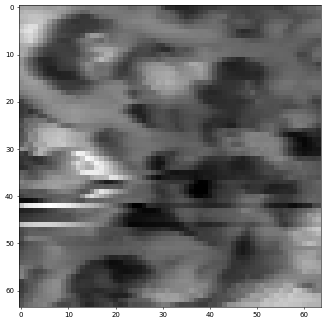

mean(|dy| - |dx|)= 0.12673072516918182
input004.png


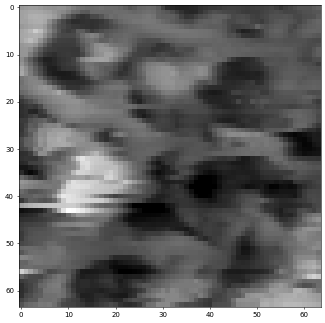

mean(|dy| - |dx|)= 0.1115892305970192
input007.png


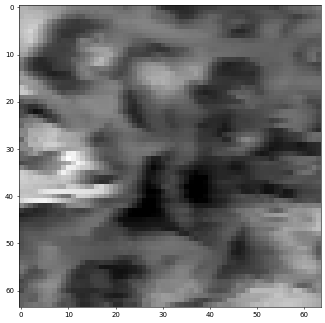

mean(|dy| - |dx|)= 0.09766583144664764
input001.png


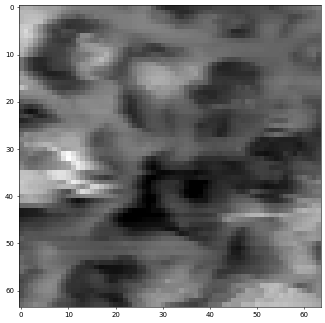

mean(|dy| - |dx|)= 0.09385240823030472
input000.png


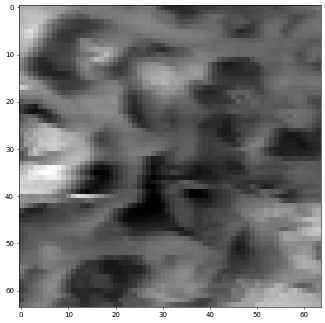

mean(|dy| - |dx|)= 0.08922078460454941
input002.png


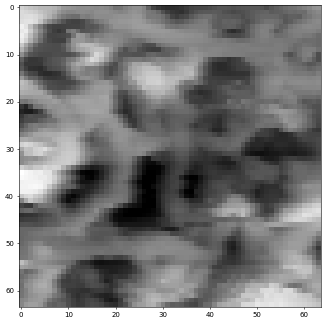

mean(|dy| - |dx|)= 0.07212463021278381
input006.png


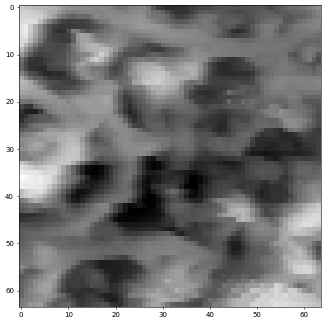

mean(|dy| - |dx|)= 0.06439167261123657
gt.png


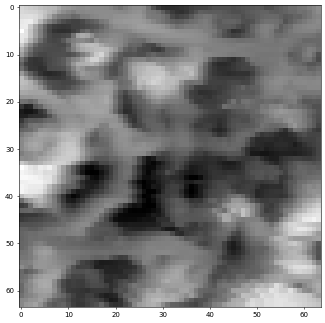

mean(|dy| - |dx|)= 0.062010571360588074
input003.png


In [5]:
data = Data('./afm_dataset/patch15_2')
kernelx = torch.Tensor([[-1., 0., 1.],
                       [-2., 0., 2.],
                       [-1., 0., 1.]])
# kernelx = torch.Tensor([[0., 0., 0.],
#                        [-1, 0., 1.],
#                        [0., 0., 0.]])
# kernel = torch.Tensor([[0, 0., 0., 0., 0],
#                        [-1, -2, 0., 2., 1],
#                        [0, 0., 0., 0., 0]])
# kernel = torch.t(kernel)
kernelx = kernelx.reshape(1, 1, *kernelx.shape)
kernely = torch.transpose(kernelx, 2, 3)


dic_score = {}
dic_data = {}

for i, (img, fname) in enumerate(data):
    score_mapx = F.conv2d(img, kernelx)
    kernel = torch.transpose(kernel, 2, 3)
    score_mapy = F.conv2d(img, kernely)
    
    # dic_score[i] = (score_mapx + score_mapy).mean().item()
    # dic_score[i] = score_mapx.mean().item() - score_mapy.mean().item()
    # dic_score[i] = (score_mapx - score_mapy).abs().mean().item()
    # dic_score[i] = (score_mapy - score_mapx).abs().mean().item()
    dic_score[i] = (score_mapy.abs() - score_mapx.abs()).mean().item()
    # dic_score[i] = (score_mapx.abs().mean() - score_mapy.abs().mean()).item()


    normal = 10
    for _map, label in [(score_mapx, 'x'), (score_mapy, 'y')]: # 
        _map_abs = np.sqrt(_map ** 2)
        print("map_abs_max", _map_abs.max())
        # _map_abs = _map_abs / _map_abs.max()
        _map_abs = _map_abs / normal
        _map_abs = tvF.to_pil_image(_map_abs.reshape(1, *_map_abs.shape[-2:]))
        plt.figure(figsize=(8, 8), dpi=50)
        plt.imshow(np.array(_map_abs), cmap = "gray")
        plt.show()
        print(fname, f':|d{label}| = {_map.abs().mean()}')
    
    img = tvF.to_pil_image(img.reshape(1, *img.shape[-2:]))
    dic_data[i] = (img, fname)
    print('-----')

print(dic_score)
dic_score_sorted = sorted(dic_score.items(), key=lambda x:x[1], reverse=True)

for idx, score in dic_score_sorted:
    plt.figure(figsize=(8, 8), dpi=50)
    plt.imshow(np.array(dic_data[idx][0]), cmap = "gray")
    plt.show()
    print('mean(|dy| - |dx|)=', score)
    print(dic_data[idx][1])

image_dir ./afm_dataset/patch13
10
input003.png
input001.png
input005.png
input008.png
input000.png
gt.png
input004.png
input007.png
input006.png
input002.png


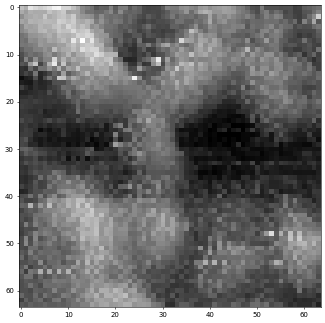

0.29266491532325745
input008.png


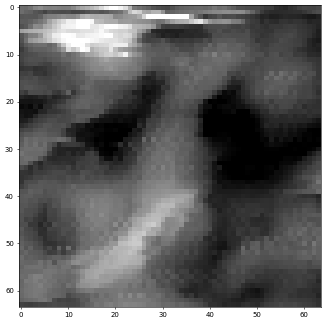

0.2811471223831177
input004.png


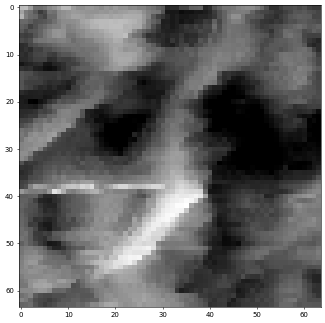

0.28052887320518494
input006.png


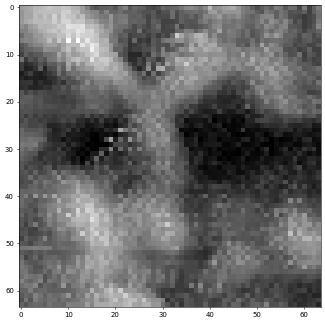

0.2793964743614197
input007.png


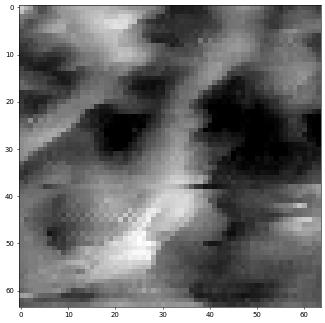

0.26977208256721497
input005.png


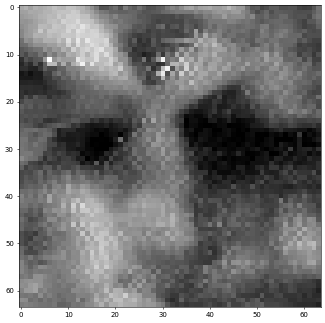

0.2667258679866791
input003.png


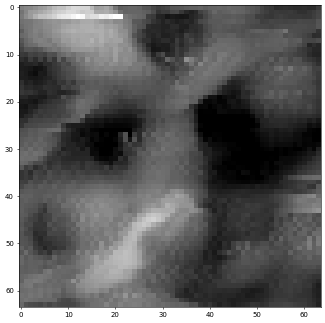

0.24604679644107819
gt.png


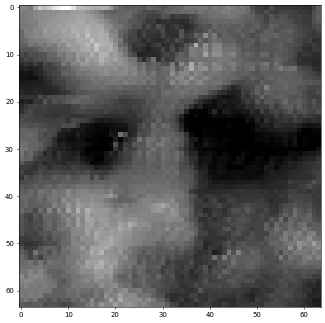

0.24575504660606384
input001.png


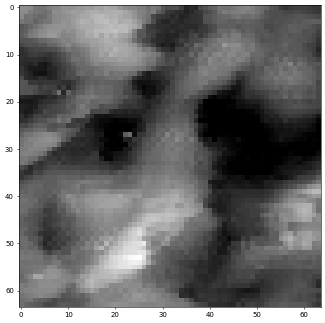

0.24571014940738678
input002.png


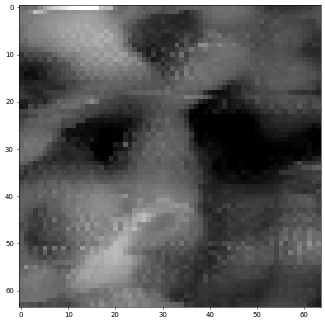

0.2421252429485321
input000.png
==== main2 ====
image_dir ./afm_dataset/patch13
10
<class 'numpy.ndarray'>

blur-score


 {0: 2053.1468675136566, 1: 1241.1917991638184, 2: 900.1913452148438, 3: 3118.262408196926, 4: 1213.392554283142, 5: 953.1996686458588, 6: 1664.8316259384155, 7: 2235.161653459072, 8: 923.9957341551781, 9: 613.5178792476654}
[[3.00000000e+00 3.11826241e+03]
 [7.00000000e+00 2.23516165e+03]
 [0.00000000e+00 2.05314687e+03]
 [6.00000000e+00 1.66483163e+03]
 [1.00000000e+00 1.24119180e+03]
 [4.00000000e+00 1.21339255e+03]
 [5.00000000e+00 9.53199669e+02]
 [8.00000000e+00 9.23995734e+02]
 [2.00000000e+00 9.00191345e+02]
 [9.00000000e+00 6.13517879e+02]]

noise-score
torch.Size([10, 3, 62, 62])
torch.Size([10])
[0.26672587 0.24575502 0.26977208 0.29266495 0.24212526 0.2460468
 0.2811471  0.27939644 0.28052887 0.24571018]

 {0: 0.26672587, 1: 0.24575502, 2: 0.26977208, 3: 0.29266495, 4: 0.24212526, 5: 0.2460468, 6: 0.2811471, 7: 0.27939644, 8: 0.28052887, 9: 0.24571018}
[[

In [178]:
from torchvision.transforms import functional as tvF
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch
import cv2



class DegradationScore:
    def __init__(self, ch=3):
        self.blurScore = BlurScore()
        self.noiseScore = NoiseScore(ch=ch)

    def __call__(self, imgs):
        return *self.blurScore(imgs), *self.noiseScore(imgs)


class NoiseScore():
    def __init__(self, ch):
        kernel = torch.Tensor([[-1., 0., 1.],
                                [-2., 0., 2.],
                                [-1., 0., 1.]])
        self.kernel1 = kernel.reshape(1, 1, *kernel.shape).repeat(ch, ch, 1, 1) # [output_ch, input_ch, kernelH, kernelW]
        self.kernel2 = torch.transpose(self.kernel1, 2, 3)

    def __call__(self, imgs):
        print('\nnoise-score')
        scores = {}
        imgs = self.array2Tensor(imgs)
        scores = self.calc(imgs)
        print(scores)
        scores = {key: val for key, val in list(enumerate(scores))}
        print('\n', scores)
        scores_sorted = np.array(sorted(scores.items(), key=lambda x:x[1], reverse=True))
        print(scores_sorted)
        return scores_sorted[:, 0], scores_sorted[:, 1] # idxs, scores

    def calc(self, imgs):
        score_map = (F.conv2d(imgs, self.kernel1) - F.conv2d(imgs, self.kernel2)).abs()
        print(score_map.shape)
        scores = score_map.mean(dim=(1, 2, 3)) / 3 # [B, C, H, W] -> [B], * Divide 3 is an operation to match the score when applied to a single image read by L type.
        print(scores.shape)
        return scores.to('cpu').detach().numpy()

    def array2Tensor(self, imgs):
        return torch.from_numpy(imgs).permute(0, 3, 1, 2) # [B, H, W, C] -> [B, C, H, W]


class BlurScore():
    def __init__(self):
        pass

    def __call__(self, imgs):
        print('\nblur-score')
        scores = {}
        for idx, img in enumerate(imgs):
            scores[idx] = self.calc(img)
    
        print('\n\n', scores)
        scores_sorted = np.array(sorted(scores.items(), key=lambda x:x[1], reverse=True))
        print(scores_sorted)
        return scores_sorted[:, 0], scores_sorted[:, 1] # idxs, scores

    def calc(self, img):
        # compute the Laplacian of the image and then return the focus
        # measure, which is simply the variance of the Laplacian
        # print(type(img), img, img.shape)
        return cv2.Laplacian((img * 255).astype(np.uint8), cv2.CV_64F).var()




class Data(Dataset):
    def __init__(self, image_dir):
        print("image_dir", image_dir)
        self.image_dir = image_dir
        self.fnames = [path.name for path in Path(image_dir).glob('*.png')]
        print(len(self.fnames))

    def __getitem__(self, i):
        # print('start dataset')
        fname = self.fnames[i]
        fpath = os.path.join(self.image_dir, fname)
        img = tvF.to_tensor(Image.open(fpath).convert('L'))   # Image.open(fpath)
        # print('fin dataset')
        return img.reshape(1, *img.shape), fname


class DataSet(Dataset):
    def __init__(self, image_dir, ch=3):
        print("image_dir", image_dir)
        self.image_dir = image_dir
        self.fnames = [path.name for path in Path(image_dir).glob('*.png')]
        print(len(self.fnames))
        self.ch = ch

    def __call__(self):
        # print('start dataset')
        for fname in self.fnames:
            fpath = os.path.join(self.image_dir, fname)
            img = tvF.to_tensor(Image.open(fpath).convert('L')).repeat(self.ch, 1, 1)  # Image.open(fpath)
            img = img.reshape(1, *img.shape)
            if 'imgs' in locals():
                imgs = torch.cat((imgs, img), 0)
            else:
                imgs = img.clone().detach()

        return imgs.permute(0, 2, 3, 1).to('cpu').detach().numpy()

def main1(path):
    data = Data(path)
    kernel = torch.Tensor([[-1., 0., 1.],
                        [-2., 0., 2.],
                        [-1., 0., 1.]])
    # kernel = torch.Tensor([[0., 0., 0.],
    #                        [-1, 0., 1.],
    #                        [0., 0., 0.]])
    # kernel = torch.Tensor([[0, 0., 0., 0., 0],
    #                        [-1, -2, 0., 2., 1],
    #                        [0, 0., 0., 0., 0]])
    # kernel = torch.t(kernel)
    kernel = kernel.reshape(1, 1, *kernel.shape)


    dic_score = {}
    dic_data = {}

    for i, (img, fname) in enumerate(data):
        score_map = F.conv2d(img, kernel)
        kernel = torch.transpose(kernel, 2, 3)
        score_map -= F.conv2d(img, kernel)
        dic_score[i] = score_map.abs().mean().item()

        score_map = tvF.to_pil_image(score_map.abs().reshape(1, *score_map.shape[-2:]))
        # plt.figure(figsize=(8, 8), dpi=50)
        # plt.imshow(np.array(score_map), cmap = "gray")
        # plt.show()
        print(fname)

        img = tvF.to_pil_image(img.reshape(1, *img.shape[-2:]))
        dic_data[i] = (img, fname)

    dic_score_sorted = sorted(dic_score.items(), key=lambda x:x[1], reverse=True)

    for idx, score in dic_score_sorted:
        plt.figure(figsize=(8, 8), dpi=50)
        plt.imshow(np.array(dic_data[idx][0]), cmap = "gray")
        plt.show()
        print(score)
        print(dic_data[idx][1])
    
def main2(path):
    dataset = DataSet(path)()
    degradationScore = DegradationScore(3)
    print(type(dataset))
    blur_idx, blur_score, noise_idx, noise_score = degradationScore(dataset)
    for i in [blur_idx, blur_score, noise_idx, noise_score]:
        print(i)
path = './afm_dataset/patch13'
main1(path)
print('==== main2 ====')
main2(path)